Implement K-Means clustering on customer dataset. Determine the number of clusters using the elbow method.

Dataset link :
https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data/input

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [61]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [62]:
df = pd.read_csv("Mall_Customers.csv", encoding="latin")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [65]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [66]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


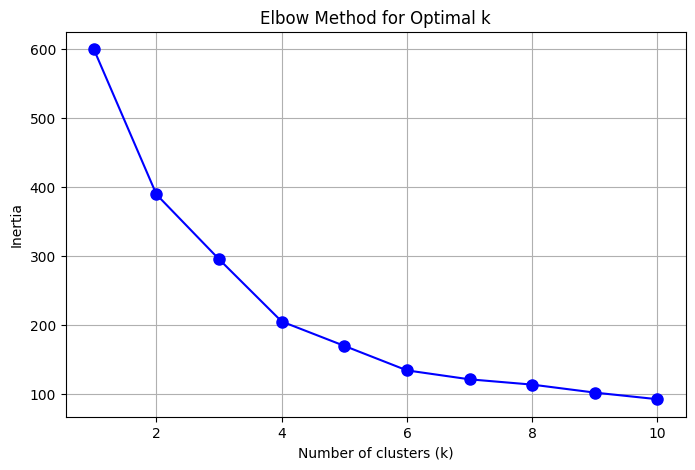

In [67]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

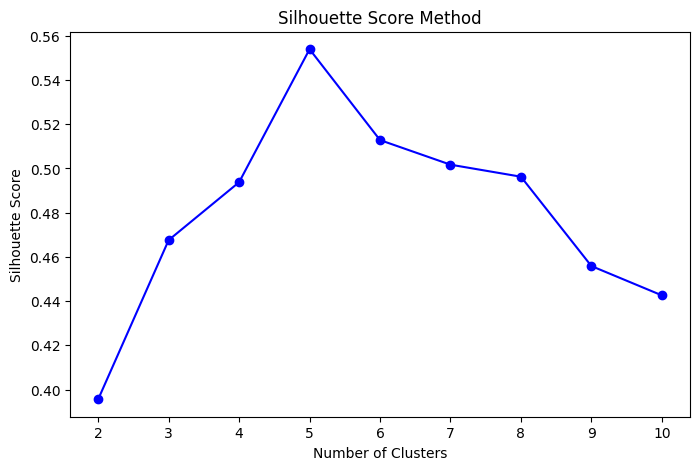

In [68]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Use the correct column names from the DataFrame
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    silhouette_scores.append(silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select the numerical features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# Standardize the data to normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = model.fit_predict(X_scaled)

# Calculate silhouette score
score = silhouette_score (X_scaled, model.labels_)
print(f'Silhouette Score: {score}')

# Retrieve the inertia
print(f'Inertia: {model.inertia_}')

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

# Display the first few rows with cluster labels
df.head()

Silhouette Score: 0.40846873777345605
Inertia: 169.89149793438568


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [70]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_centers)

         Age  Annual Income (k$)  Spending Score (1-100)
0  55.275862           47.620690               41.706897
1  32.875000           86.100000               81.525000
2  25.769231           26.115385               74.846154
3  26.733333           54.311111               40.911111
4  44.387097           89.774194               18.483871


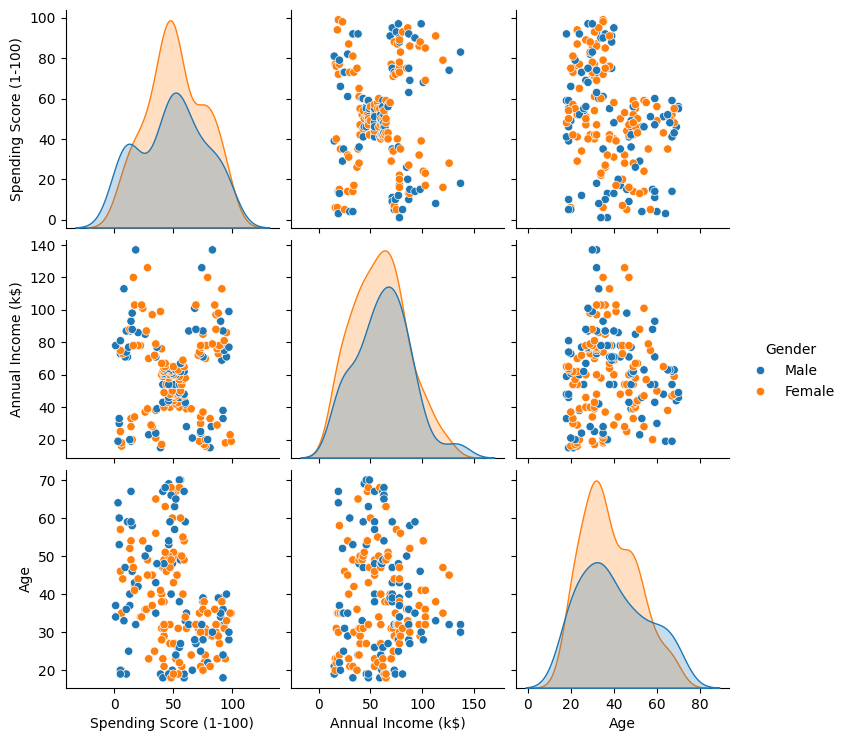

In [71]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

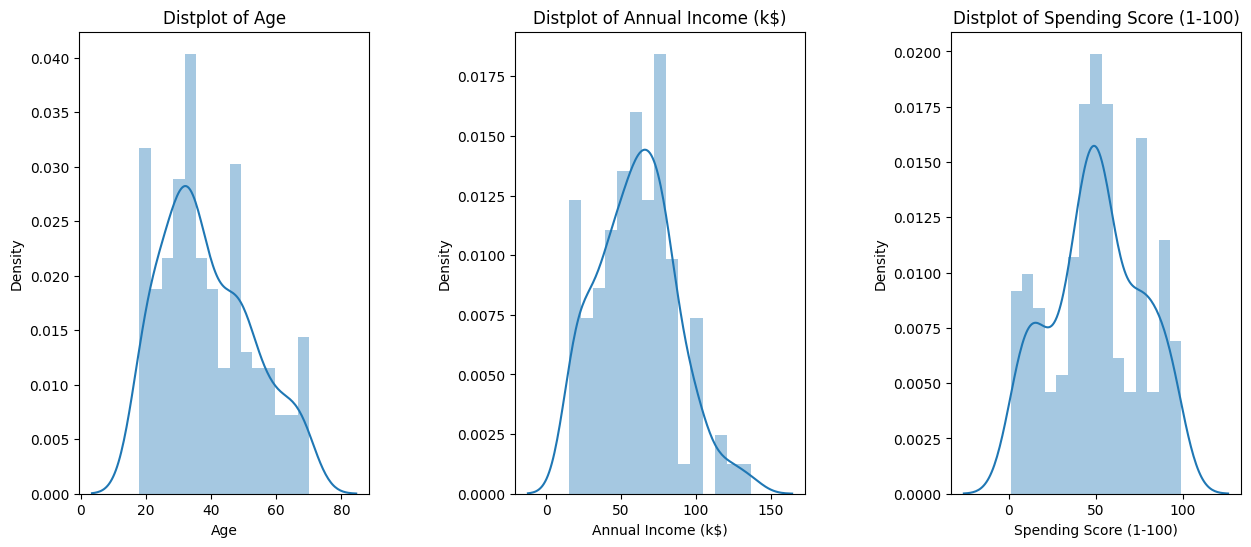

In [72]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

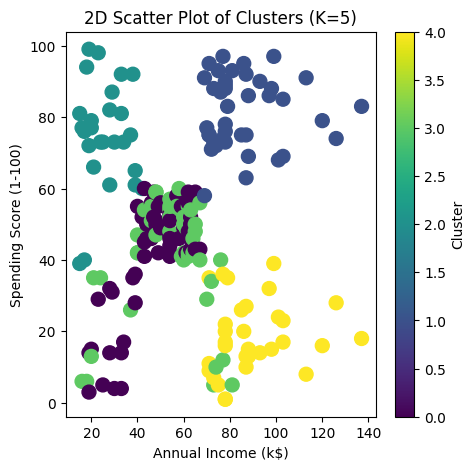

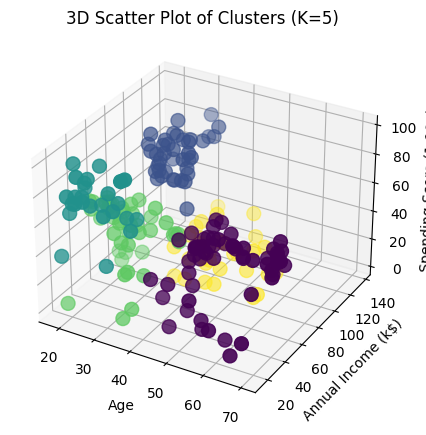

In [73]:
from mpl_toolkits.mplot3d import Axes3D

# Perform K-Means clustering with 5 clusters
model = KMeans(n_clusters=5, init="k-means++", random_state=42)
clusters = model.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

# 2D Scatter Plot
plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('2D Scatter Plot of Clusters (K=5)')
plt.colorbar(label='Cluster')
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter with clusters
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis', s=100)

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot of Clusters (K=5)')

plt.show()

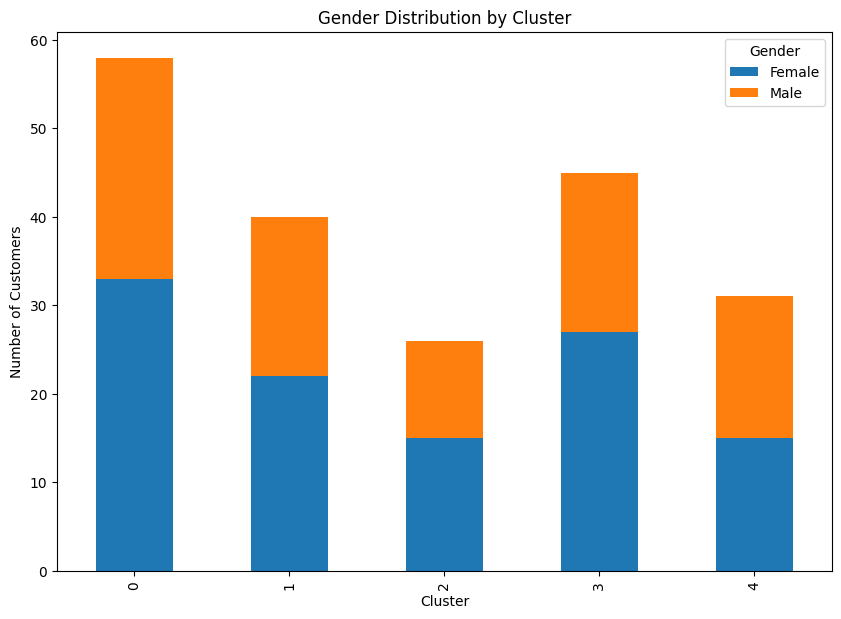

In [74]:
# Assuming there is a categorical feature, e.g., 'Gender'
gender_counts = df.groupby(['cluster', 'Gender']).size().unstack() # Changed 'Cluster' to 'cluster'
gender_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Gender Distribution by Cluster')
plt.ylabel('Number of Customers')
plt.xlabel('Cluster')
plt.show()



In [75]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'],
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)